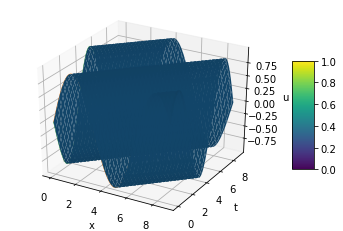

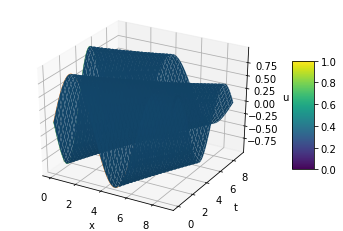

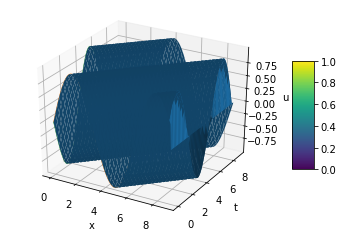

1
1
2


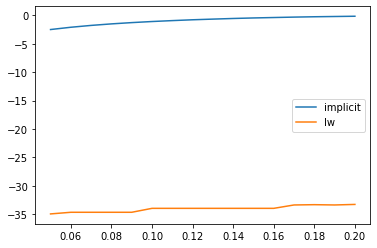

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import matplotlib.patches as patches
import numpy as np
import math
import random
import scipy.optimize
from scipy.optimize import least_squares
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

#Ut + a*Ux = 0
#U(t = 0) = phi(x)
#U(x = 0) = mu(t)

#a = 1
#U(t = 0) = sin(x)
#U(x = 0) = -sin(t)
#U = sin(x - t)

def solve_up(phi, mu, a, h, tau, N, M):
    u = ([([0 for i in range(M)]) for j in range(N)])
    
    for i in range(N):
        u[i][0] = phi(i*h)
        
    for j in range(M):
        u[0][j] = mu(j * tau)
    
    k = tau * a / h
    for j in range (0, M-1):
        #u[0][j+1] = u[0][j] - k * (u[1][j] - u[0][j]) 
        for i in range (1, N):
            u[i][j+1] = u[i][j] - k * (u[i][j] - u[i-1][j])
    
    #np.array([np.array([1 for i in range(M)]) for j in range(N)])
    return np.array([np.array([u[j][i] for i in range(M)]) for j in range(N)])

def solve_implicit(phi, mu, a, h, tau, N, M):
    u = ([([0 for i in range(M)]) for j in range(N)])
    
    for i in range(N):
        u[i][0] = phi(i*h)
        
    for j in range(M):
        u[0][j] = mu(j * tau)
    
    k = tau * a / h
    for j in range (0, M-1):
        for i in range (1, N):
            u[i][j+1] = u[i][j] / (1+k) + u[i-1][j+1] * k / (1+k)
            #np.array([np.array([1 for i in range(M)]) for j in range(N)])
    return np.array([np.array([u[j][i] for i in range(M)]) for j in range(N)])

def solve_lw(phi, mu, a, h, tau, N, M):
    u = ([([0 for i in range(M)]) for j in range(N)])
    
    for i in range(N):
        u[i][0] = phi(i*h)
        
    for j in range(M):
        u[0][j] = mu(j * tau)
    
    k = tau * a / h
    for j in range (0, M-1):
        for i in range (1, N-1):
            u[i][j+1] = u[i-1][j] * k * (1+k) / 2 + u[i][j] * (1-k**2) - k/2 * (1-k)*u[i+1][j]
            #np.array([np.array([1 for i in range(M)]) for j in range(N)])
    return np.array([np.array([u[j][i] for i in range(M)]) for j in range(N)])


def calcInfl(meth, phi, mu, a, h, tau, N, M, trueSol):
    u =  meth(phi, mu, a, h, tau, N, M)
    
    res = 0
    
    for i in range(N):
        for j in range(M):
            if i + j >= N:
                continue
            
            x = h * i
            t = j * tau
            
            err = math.fabs(trueSol(x, t) - u[i][j])
            
            res = max(err, res)
            
    return res

def testMethod(meth, phi, mu, a, hs, N, M, trueSol):
    errs = []
    
    for h in hs:
        errs.append(calcInfl(meth, phi, mu, a, h, h, N, M, trueSol))
    
    return errs
    
def drawTests(phi, mu, a, hs, N, M, trueSol):
    err1 = testMethod(solve_up, phi, mu, a, hs, N, M, trueSol)
    err2 = testMethod(solve_implicit, phi, mu, a, hs, N, M, trueSol)
    err3 = testMethod(solve_lw, phi, mu, a, hs, N, M, trueSol)
    
    fig, ax = plt.subplots()
    
    hs_ = [math.log(h) for h in hs]
    err1_ = [math.log(err) for err in err1]
    err2_ = [math.log(err) for err in err2]
    err3_ = [math.log(err) for err in err3]
    
 #   ax.plot(hs, err1_, label = 'up')
    ax.plot(hs, err2_, label = 'implicit')
    ax.plot(hs, err3_, label = 'lw')
    
    k = (err1_[0] - err1_[-1]) / (hs_[0] - hs_[-1])
    print(round(k))
    k = (err3_[0] - err3_[-1]) / (hs_[0] - hs_[-1])
    print(round(k))
    k = (err2_[0] - err2_[-1]) / (hs_[0] - hs_[-1])
    print(round(k))
    
    ax.legend()
    plt.show()

def draw3d(meth, phi, mu, a, h, tau, N, M, trueSol):
    u = meth(phi, mu, 1, h, tau, N, M)    
    uTrue = np.array([np.array([trueSol(h * j, tau * i) for i in range(M)]) for j in range(N)])

    xs = np.array([i * h for i in range(N)])
    ts = np.array([i * tau for i in range(M)])

    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    
    X, Y = np.meshgrid(xs, ts)
    
    surf = ax.plot_surface(Y, X, u)
    #surfTrue = ax.plot_surface(Y, X, uTrue)
    
    ax.plot(xs, [0 for i in range(M)], [phi(xs[i]) for i in range(len(xs))], lw=0.5)
    ax.plot([0 for i in range(N)], ts, [mu(ts[i]) for i in range(len(ts))], lw=0.5)
    
    fig.colorbar(surf, shrink=0.5, aspect=5)
    #fig.colorbar(surfTrue, shrink=0.5, aspect=5)
    ax.set_xlabel('x')
    ax.set_ylabel('t')
    ax.set_zlabel('u')
    plt.show()
    
    
def phi1(x):
    return math.sin(x)

def mu1(t):
    return -math.sin(t)

def trueSol1(x, t):
    return math.sin(x - t)



h = 0.09
tau = 0.09
N = 100
M = 100

draw3d(solve_up, phi1, mu1, 1, h, tau, N, M, trueSol1)
draw3d(solve_implicit, phi1, mu1, 1, h, tau, N, M, trueSol1)
draw3d(solve_lw, phi1, mu1, 1, h, tau, N, M, trueSol1)
drawTests(phi1, mu1, 1, np.arange(0.05, 0.2, 0.01), N, M, trueSol1)